# Challenge

The problem consists in predicting the probability of delay of the flights that land or take off from the airport of Santiago de Chile
(SCL). For that you will have a dataset using public and real data where each row corresponds to a flight that landed or took off
from SCL during 2017. The following information is available for each flight:

* Fecha-I: Scheduled date and time of the flight.
* Vlo-I : Scheduled flight number.
* Ori-I : Programmed origin city code.
* Des-I : Programmed destination city code.
* Emp-I : Scheduled flight airline code.
* Fecha-O : Date and time of flight operation.
* Vlo-O : Flight operation number of the flight.
* Ori-O : Operation origin city code
* Des-O : Operation destination city code.
* Emp-O : Airline code of the operated flight.
* DIA: Day of the month of flight operation.
* MES : Number of the month of operation of the flight.
* AÑO : Year of flight operation.
* DIANOM : Day of the week of flight operation.
* TIPOVUELO : Type of flight, I =International, N =National.
* OPERA : Name of the airline that operates.
* SIGLAORI: Name city of origin.
* SIGLADES: Destination city name.

## Question #1

How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?

In [1]:
import pandas as pd
from datetime import datetime, time
from datetime import timedelta


# Load data
df = pd.read_csv('dataset_SCL.csv')
print(df.isna().sum())
# There is a NA in Vlo-O
df = df[df['Vlo-O'].notna()]

# 1. How is the data distributed?
# Show summary statistics for relevant columns
print(df[['Fecha-I', 'Fecha-O']].describe())


# Count number of unique values for categorical columns
for col in ['Ori-I', 'Des-I', 'Emp-I', 'Ori-O', 'Des-O', 'Emp-O', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES']:
    print(col + ':', df[col].nunique())

# Count number of flights by month and type of flight
print(df.groupby(['MES', 'TIPOVUELO'])['Vlo-I'].count())

# General description
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

/home/almendra/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64
                    Fecha-I              Fecha-O
count                 68205                68205
unique                53252                62774
top     2017-03-19 18:00:00  2017-05-19 07:01:00
freq                      6                    5
Ori-I: 1
Des-I: 64
Emp-I: 30
Ori-O: 1
Des-O: 63
Emp-O: 32
DIANOM: 7
TIPOVUELO: 2
OPERA: 23
SIGLAORI: 1
SIGLADES: 62
MES  TIPOVUELO
1    I            2804
     N            3303
2    I            2499
     N            3062
3    I            2496
     N            2986
4    I            2354
     N            2666
5    I            2428
     N            2812
6    I            2373
     N            2608
7    I            2865
     N            3127
8    I            2

In [4]:
pd.set_option('display.max_columns', None)
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


There are 64 destinations,  2 types of flight, 23 different airlines. Almost all the data its from year 2017, with the exception of two flights. There are times when flights arrive earlier than expected, its something important to note.

## Question #2

Generate the following additional columns. Please export them to a CSV file named synthetic_features.csv:

* high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.
* min_diff : difference in minutes between Date-O and Date-I .
* delay_15 : 1 if min_diff > 15, 0 if not.
* period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), basedonDate-I .

In [5]:
# 2. Generate additional columns
# Create min_diff column
min_diff = []
for i in range(len(df)):
    fecha_i = datetime.strptime(df.iloc[i]['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    fecha_o = datetime.strptime(df.iloc[i]['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    if fecha_o < fecha_i:
        fecha_o += timedelta(days=1)
        diff =  fecha_i - fecha_o
        min_diff.append(- diff.seconds//60)
    else: 
        fecha_o += timedelta(days=1)
        diff =  fecha_o - fecha_i
        min_diff.append(diff.seconds//60)

df['min_diff'] = min_diff

# Create delay_15 column
df['delay_15'] = (df['min_diff'] > 15).astype(int) 
# Convert Fecha-I and Fecha-O to datetime format
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S')
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], format='%Y-%m-%d %H:%M:%S')

# Create high_season column
df['high_season'] = ((df['Fecha-I'].dt.month == 12) & (df['Fecha-I'].dt.day >= 15)) | \
                    ((df['Fecha-I'].dt.month == 1) | (df['Fecha-I'].dt.month == 2) | (df['Fecha-I'].dt.month == 3)) | \
                    ((df['Fecha-I'].dt.month == 7) & (df['Fecha-I'].dt.day >= 15) & (df['Fecha-I'].dt.day <= 31)) | \
                    ((df['Fecha-I'].dt.month == 9) & (df['Fecha-I'].dt.day >= 11) & (df['Fecha-I'].dt.day <= 30))
df['high_season'] = df['high_season'].astype(int)


# Create period_day column
morning = range(5, 12)
afternoon = range(12, 19)
night = list(range(0, 5)) + list(range(19, 24))
df['period_day'] = df['Fecha-I'].apply(lambda x: 'morning' if x.time().hour in morning else \
                                                        ('afternoon' if x.time().hour in afternoon else 'night'))

# Export to CSV
df[['high_season', 'min_diff', 'delay_15', 'period_day']].to_csv('synthetic_features.csv', index=False)


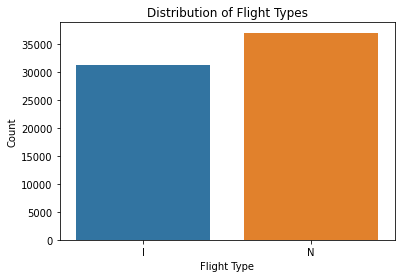

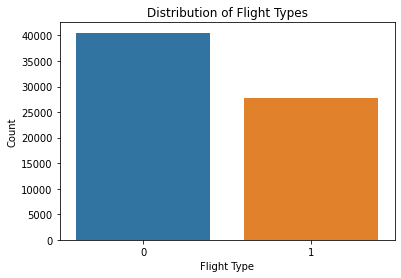

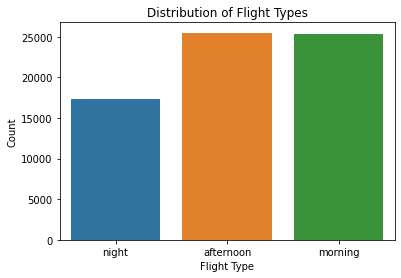

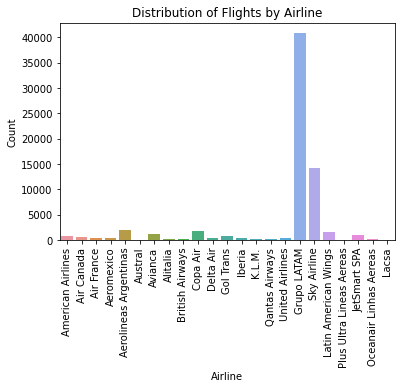

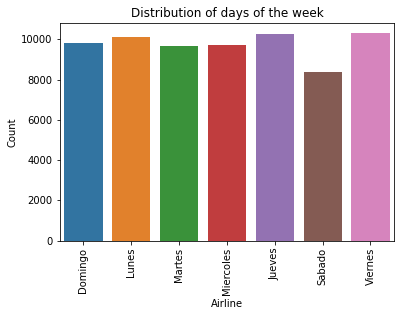

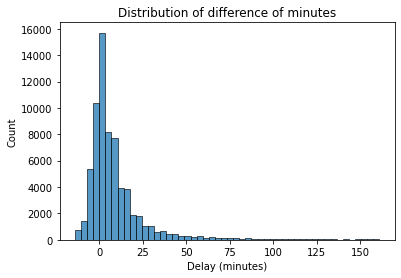

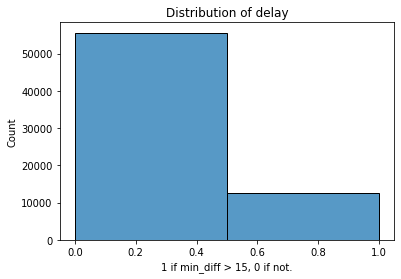

In [6]:
## Visual exploratory analysis
import seaborn as sns 
import matplotlib.pyplot as plt

# Plot the distribution of flight types
sns.countplot(x='TIPOVUELO', data=df)
plt.title('Distribution of Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()

# Plot the distribution of high season
sns.countplot(x='high_season', data=df)
plt.title('Distribution of Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()

# Plot the distribution of period of the day
sns.countplot(x='period_day', data=df)
plt.title('Distribution of Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()

# Plot the distribution of flights by airline
sns.countplot(x='OPERA', data=df)
plt.title('Distribution of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of flights by airline
sns.countplot(x='DIANOM', data=df)
plt.title('Distribution of days of the week')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of delays
sns.histplot(x='min_diff', data=df, bins=50)
plt.title('Distribution of difference of minutes')
plt.xlabel('Delay (minutes)')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of the target variable
sns.histplot(data=df, x='delay_15', bins=2)
plt.title('Distribution of delay')
plt.xlabel('1 if min_diff > 15, 0 if not.')
plt.ylabel('Count')
plt.show()




## Question #3

What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight? What variables would you expect to have the most influence in predicting delays?

In [ ]:
# Destination delay
dest_delay = df.groupby('Des-I').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(dest_delay.sort_values([('delay_15', 'count')], ascending=[False]))

# Airline delay
airline_delay = df.groupby('OPERA').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(airline_delay.sort_values([('delay_15', 'count')], ascending=[False]))

# Month delay
month_delay = df.groupby('MES').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(month_delay.sort_values(['MES'], ascending=[True]))

# Day of the week delay
dayofweek = df.groupby('DIANOM').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(dayofweek.sort_values([('delay_15', 'count')], ascending=[False]))

# Season Delay
season_delay = df.groupby('high_season').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(season_delay.sort_values([('delay_15', 'count')], ascending=[False]))

# Type of flight delay
flighttype_delay = df.groupby('TIPOVUELO').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(flighttype_delay.sort_values([('delay_15', 'count')], ascending=[False]))

In [ ]:
# without min_diff and count
# Destination delay
dest_delay = df.groupby('Des-I').agg({'delay_15': 'mean'})

# Airline delay
airline_delay = df.groupby('OPERA').agg({'delay_15': 'mean'})

# Month delay
month_delay = df.groupby('MES').agg({'delay_15': 'mean'})

# Day of the week delay
dayofweek = df.groupby('DIANOM').agg({'delay_15': 'mean'})

# Season Delay
season_delay = df.groupby('high_season').agg({'delay_15': 'mean'})

# Type of flight delay
flighttype_delay = df.groupby('TIPOVUELO').agg({'delay_15': 'mean'})


In [ ]:
# Plot the delay rate and average delay time by destination, airline, month, day of the week, season, and type of flight
sns.set_style('whitegrid')
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

dest_delay.plot(kind='barh', ax=axes[0, 0])
axes[0, 0].set_title('Delay Rate and Average Delay Time by Destination')
axes[0, 0].set_xlabel('Delay Rate')
axes[0, 0].set_ylabel('Destination Code')

airline_delay.plot(kind='barh', ax=axes[0, 1])
axes[0, 1].set_title('Delay Rate and Average Delay Time by Airline')
axes[0, 1].set_xlabel('Delay Rate')
axes[0, 1].set_ylabel('Airline Code')

month_delay.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Delay Rate and Average Delay Time by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Delay Rate / Average Delay Time')

dayofweek.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Delay Rate and Average Delay Time by Day of the Week')
axes[1, 1].set_xlabel('Day of the Week')
axes[1, 1].set_ylabel('Delay Rate / Average Delay Time')

season_delay.plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_title('Delay Rate and Average Delay Time by Season')
axes[2, 0].set_xlabel('Season')
axes[2, 0].set_ylabel('Delay Rate / Average Delay Time')

flighttype_delay.plot(kind='bar', ax=axes[2, 1])
axes[2, 1].set_title

Based on the exploratory analysis, we can observe the following behavior of delay rate across different variables:

* Destination: Flights departing to some specific destinations have a higher likelihood of getting delayed. 

* Airline: Different airlines have different delay rates. For example, Latin American Wings has a relatively higher delay rate as compared to other airlines.

* Month of the year: The delay rate is relatively higher in some specific months such as July, October and December.

* Day of the week: The delay rate is relatively higher on some specific days such as Fridays.

* Season: The delay rate is almost the same on both cases.

* Type of flight: International flights have a relatively higher delay rate as compared to national flights.

## Question #4

Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay.
Feel free to generate additional variables and/or supplement with external variables.

In [7]:
# Import libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define features and target variable
#df = df.drop(['Fecha-I', 'Fecha-O'], axis=1)
#string_columns = df.select_dtypes(include='object').columns
#df = pd.get_dummies(df, columns=string_columns)

# Split the dataset into X (features) and y (target variable)
X = df.drop(['delay_15', 'min_diff'], axis=1)
y = df['delay_15']
df = df.loc[:,~df.columns.duplicated()].copy()

# Balance the target variable using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X.values, y.ravel())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Train random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test set
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate model performance
lr_acc = accuracy_score(y_test, lr_preds)
lr_prec = precision_score(y_test, lr_preds)
lr_rec = recall_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)

rf_acc = accuracy_score(y_test, rf_preds)
rf_prec = precision_score(y_test, rf_preds)
rf_rec = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)

print("Logistic Regression Model:")
print(f"Accuracy: {lr_acc}")
print(f"Precision: {lr_prec}")
print(f"Recall: {lr_rec}")
print(f"F1-score: {lr_f1}")

print("\nRandom Forest Model:")
print(f"Accuracy: {rf_acc}")
print(f"Precision: {rf_prec}")
print(f"Recall: {rf_rec}")
print(f"F1-score: {rf_f1}")


/home/almendra/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Model:
Accuracy: 0.8734091828933759
Precision: 0.9676390154968095
Recall: 0.7703891862469382
F1-score: 0.8578211020758624

Random Forest Model:
Accuracy: 0.8690021135944597
Precision: 0.8831254724111867
Recall: 0.8479542774199401
F1-score: 0.8651825797195353


In [9]:
df.head()


DIA  MES   AÑO  min_diff  delay_15  high_season  Vlo-I_4  Vlo-I_6  Vlo-I_8  \
0    1    1  2017         3         0            1        0        0        0   
1    2    1  2017         9         0            1        0        0        0   
2    3    1  2017         9         0            1        0        0        0   
3    4    1  2017         3         0            1        0        0        0   
4    5    1  2017        -2         0            1        0        0        0   

   Vlo-I_10  Vlo-I_26  Vlo-I_32  Vlo-I_33  Vlo-I_43  Vlo-I_50  Vlo-I_52  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Vlo-I_54  Vlo-I_86  Vlo-I_88  Vlo-I_110  Vlo-I_112  Vlo-I_200  Vlo-I_201  \
0         0         0         0          0          0          0          0   
1         0         0         0          0          0          0          0   
2         0         0         0          0          0          0          0   
3         0         0         0          0          0          0          0   
4         0         0         0          0          0          0          0   

   Vlo-I_202  Vlo-I_203  Vlo-I_207  Vlo-I_251  Vlo-I_253  Vlo-I_255  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Vlo-I_265  Vlo-I_267  Vlo-I_269  Vlo-I_271  Vlo-I_273  Vlo-I_275  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Vlo-I_277  Vlo-I_279  Vlo-I_281  Vlo-I_283  Vlo-I_285  Vlo-I_287  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Vlo-I_289  Vlo-I_291  Vlo-I_293  Vlo-I_295  Vlo-I_297  Vlo-I_300  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Vlo-I_301  Vlo-I_302  Vlo-I_304  Vlo-I_305  Vlo-I_306  Vlo-I_307  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Vlo-I_308  Vlo-I_312  Vlo-I_314  Vlo-I_316  Vlo-I_318  Vlo-I_320  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Vlo-I_322  Vlo-I_324  Vlo

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt 

y_pred_proba = rf_model.predict_proba(X_test)[:,1]

# Calculate the fpr, tpr, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-rguc5fug because the default path (/home/almendra/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<Figure size 640x480 with 1 Axes>